In [1]:
import pandas as pd,numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def percentage(df,df1,item):
    all_loans = df[item].value_counts().sort_index()
    bad_loans = df1[item].value_counts().sort_index() / all_loans * 100
    print(bad_loans)
    
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y    

In [3]:
df = pd.read_csv('loan_data_core.csv')

C:\Users\leero\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#dropping not so important stuff, variables that appear in the future

drop_list = ['member_id','url','desc','emp_title','title','addr_state','next_pymnt_d','last_pymnt_amnt',
             'hardship_flag','hardship_type','hardship_reason','hardship_status','hardship_amount',
             'hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length',
             'hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest',
             'hardship_payoff_balance_amount','hardship_last_payment_amount','debt_settlement_flag',
             'policy_code','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee'
             ]
df.dropna(subset=['id'],inplace=True)
df.drop(drop_list,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2507640 entries, 0 to 2507639
Columns: 128 entries, id to settlement_term
dtypes: float64(102), int64(1), object(25)
memory usage: 2.4+ GB


In [5]:
#conversions
df.issue_d = pd.to_datetime(df.issue_d,format='%b-%y')
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line,format='%b-%y')
df['length_of_cr'] = df.issue_d - df.earliest_cr_line
df.length_of_cr = df.length_of_cr.dt.days.astype(int)/365

#cash = 1
df.disbursement_method = df.disbursement_method.apply(lambda disbursement_method: 1 if disbursement_method =='Cash' else 0)

#good loans = 1
df.loan_status = df.loan_status.apply(lambda loan_status: 1 if loan_status != 'Charged Off' else 0)
df.term = df.term.apply(lambda months: int(months[1:3]))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2507640 entries, 0 to 2507639
Columns: 129 entries, id to length_of_cr
dtypes: datetime64[ns](2), float64(103), int64(4), object(20)
memory usage: 2.4+ GB


In [6]:
df_bad = df.loc[df.loan_status==0]
df_pass = df.loc[df.loan_status==1]

print(len(df_bad)/len(df))

len(df_bad),len(df_pass)

0.19864095324687756


(498120, 2009520)

In [7]:
for thing in df.columns:
    print(thing)

id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
purpose
zip_code
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_u

In [8]:
percentage(df,df_pass,'grade')

A    94.010790
B    86.739863
C    77.783493
D    69.890656
E    61.607294
F    54.953192
G    50.086936
Name: grade, dtype: float64


In [9]:
percentage(df,df_bad,'grade')

A     5.989210
B    13.260137
C    22.216507
D    30.109344
E    38.392706
F    45.046808
G    49.913064
Name: grade, dtype: float64


In [36]:
percentage(df,df_bad,'disbursement_method')

print(len(df_bad)/len(df))

q = df.loc[df.disbursement_method == 0]['loan_status']

stats.ttest_1samp(q,len(df_pass)/len(df))

0    21.901528
1    19.856410
Name: disbursement_method, dtype: float64
0.19864095324687756


Ttest_1sampResult(statistic=-4.782108099623668, pvalue=1.760958547972953e-06)

In [37]:
percentage(df,df_bad,'pub_rec_bankruptcies')

0.0      19.491481
1.0      22.368998
2.0      24.771136
3.0      22.841965
4.0      27.688172
5.0      24.060150
6.0      33.333333
7.0      26.666667
8.0      44.444444
9.0      50.000000
11.0    100.000000
12.0           NaN
Name: pub_rec_bankruptcies, dtype: float64


In [14]:
percentage(df,df_bad,'verification_status')

Not Verified       14.468647
Source Verified    20.935282
Verified           23.670042
Name: verification_status, dtype: float64


In [49]:
percentage(df,df_bad,'home_ownership')

ANY         19.305019
MORTGAGE    17.133947
NONE        14.583333
OTHER       18.750000
OWN         20.517201
RENT        23.094300
Name: home_ownership, dtype: float64


In [51]:
percentage(df,df_bad,'total_rec_prncp')

0.00        100.0
0.01        100.0
2.13        100.0
5.03        100.0
5.62        100.0
10.07       100.0
16.37       100.0
17.27       100.0
18.25       100.0
18.80       100.0
19.31       100.0
19.42       100.0
19.43       100.0
20.00       100.0
20.03       100.0
20.18       100.0
20.50       100.0
20.69       100.0
21.16       100.0
21.21       100.0
21.34       100.0
21.60       100.0
21.63       100.0
21.73       100.0
21.93       100.0
22.15       100.0
22.24       100.0
22.34       100.0
22.36       100.0
22.50       100.0
            ...  
38975.00      NaN
39000.00      NaN
39075.00      NaN
39100.00      NaN
39125.00      NaN
39150.00      NaN
39175.00      NaN
39200.00      NaN
39250.00      NaN
39275.00      NaN
39350.00      NaN
39400.00      NaN
39450.00      NaN
39475.00      NaN
39500.00      NaN
39525.00      NaN
39550.00      NaN
39575.00      NaN
39600.00      NaN
39625.00      NaN
39650.00      NaN
39675.00      NaN
39750.00      NaN
39775.00      NaN
39800.00  

In [50]:
percentage(df,df_bad,'percentage(df,df_bad,'home_ownership')')

1.0    19.864095
Name: policy_code, dtype: float64


In [48]:
df.loc[df.verification_status!='Not Verified']

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,deferral_term,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,length_of_cr
0,1077501,5000.0,5000.0,4975.00000,36,10.65%,162.87,B,B2,10+ years,...,NaN,1,N,NaN,NaN,NaN,NaN,NaN,NaN,26.931507
1,1077430,2500.0,2500.0,2500.00000,60,15.27%,59.83,C,C4,< 1 year,...,NaN,1,N,NaN,NaN,NaN,NaN,NaN,NaN,12.676712
3,1076863,10000.0,10000.0,10000.00000,36,13.49%,339.31,C,C1,10+ years,...,NaN,1,N,NaN,NaN,NaN,NaN,NaN,NaN,15.841096
4,1075358,3000.0,3000.0,3000.00000,60,12.69%,67.79,B,B5,1 year,...,NaN,1,N,NaN,NaN,NaN,NaN,NaN,NaN,15.926027
5,1075269,5000.0,5000.0,5000.00000,36,7.90%,156.46,A,A4,3 years,...,NaN,1,N,NaN,NaN,NaN,NaN,NaN,NaN,7.084932
7,1072053,3000.0,3000.0,3000.00000,36,18.64%,109.43,E,E1,9 years,...,NaN,1,N,NaN,NaN,NaN,NaN,NaN,NaN,4.917808
8,1071795,5600.0,5600.0,5600.00000,60,21.28%,152.39,F,F2,4 years,...,NaN,1,N,NaN,NaN,NaN,NaN,NaN,NaN,7.671233
9,1071570,5375.0,5375.0,5350.00000,60,12.69%,121.45,B,B5,< 1 year,...,NaN,1,N,NaN,NaN,NaN,NaN,NaN,NaN,7.252055
11,1069908,12000.0,12000.0,12000.00000,36,12.69%,402.54,B,B5,10+ years,...,NaN,1,N,NaN,NaN,NaN,NaN,NaN,NaN,22.180822
12,1064687,9000.0,9000.0,9000.00000,36,13.49%,305.38,C,C1,< 1 year,...,NaN,1,N,NaN,NaN,NaN,NaN,NaN,NaN,7.671233


In [15]:
percentage(df,df_bad,'verification_status_joint')

Not Verified       21.664009
Source Verified    23.030149
Verified           25.917038
Name: verification_status_joint, dtype: float64


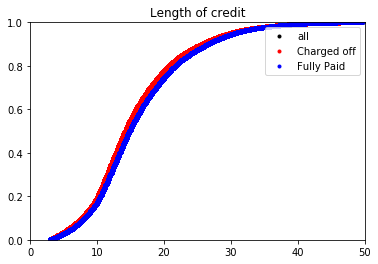

count    2.507640e+06
mean     1.602440e+01
std      7.998902e+00
min     -6.004110e+01
25%      1.117534e+01
50%      1.475616e+01
75%      1.993151e+01
max      4.970137e+01
Name: length_of_cr, dtype: float64
count    498120.000000
mean         15.445255
std           8.078662
min         -58.709589
25%          10.838356
50%          14.178082
75%          19.183562
max          49.117808
Name: length_of_cr, dtype: float64
count    2.009520e+06
mean     1.616796e+01
std      7.972506e+00
min     -6.004110e+01
25%      1.126027e+01
50%      1.484384e+01
75%      2.009863e+01
max      4.970137e+01
Name: length_of_cr, dtype: float64


In [16]:
df_x,df_y = ecdf(df.length_of_cr)
df_bad_x,df_bad_y = ecdf(df_bad.length_of_cr)
df_pass_x,df_pass_y = ecdf(df_pass.length_of_cr)

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([0, 50, 0, 1])
plt.title('Length of credit')
plt.legend(loc='best')
plt.show()

print(df.length_of_cr.describe())
print(df_bad.length_of_cr.describe())
print(df_pass.length_of_cr.describe())


In [17]:
percentage(df,df_pass,'emp_length')

1 year       79.530617
10+ years    81.274770
2 years      80.266187
3 years      80.089343
4 years      80.298551
5 years      80.488271
6 years      80.751309
7 years      80.557084
8 years      80.118148
9 years      80.123588
< 1 year     79.663533
Name: emp_length, dtype: float64


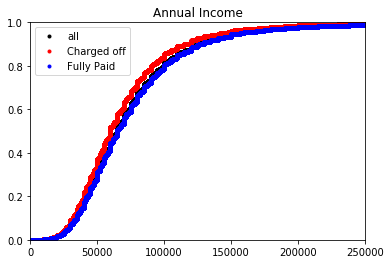

count    2.507640e+06
mean     7.609940e+04
std      6.969604e+04
min      0.000000e+00
25%      4.594575e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64
count    4.981200e+05
mean     7.024296e+04
std      6.568454e+04
min      0.000000e+00
25%      4.300000e+04
50%      6.000000e+04
75%      8.500000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64
count    2.009520e+06
mean     7.755109e+04
std      7.058010e+04
min      0.000000e+00
25%      4.700000e+04
50%      6.500000e+04
75%      9.270000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64


In [18]:
df_x,df_y = ecdf(df.annual_inc)
df_bad_x,df_bad_y = ecdf(df_bad.annual_inc)
df_pass_x,df_pass_y = ecdf(df_pass.annual_inc)

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([0, 250000, 0, 1])
plt.title('Annual Income')
plt.legend(loc='best')
plt.show()

print(df.annual_inc.describe())
print(df_bad.annual_inc.describe())
print(df_pass.annual_inc.describe())

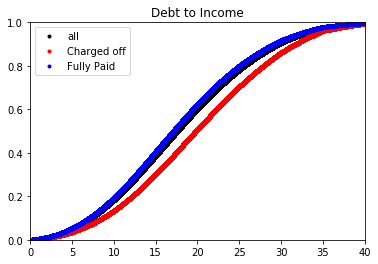

count    2.507172e+06
mean     1.822313e+01
std      1.051788e+01
min     -1.000000e+00
25%      1.181000e+01
50%      1.761000e+01
75%      2.401000e+01
max      9.990000e+02
Name: dti, dtype: float64
count    498034.000000
mean         20.132151
std          10.537612
min           0.000000
25%          13.630000
50%          19.800000
75%          26.310000
max         999.000000
Name: dti, dtype: float64
count    2.009138e+06
mean     1.774991e+01
std      1.045924e+01
min     -1.000000e+00
25%      1.143000e+01
50%      1.709000e+01
75%      2.339000e+01
max      9.990000e+02
Name: dti, dtype: float64


In [19]:
df_x,df_y = ecdf(df.dti)
df_bad_x,df_bad_y = ecdf(df_bad.dti)
df_pass_x,df_pass_y = ecdf(df_pass.dti)

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([0, 40, 0, 1])
plt.title('Debt to Income')
plt.legend(loc='best')
plt.show()

print(df.dti.describe())
print(df_bad.dti.describe())
print(df_pass.dti.describe())

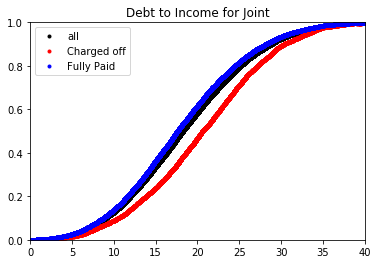

count    36552.000000
mean        18.686105
std          7.573205
min          0.000000
25%         13.217500
50%         18.265000
75%         23.832500
max         69.490000
Name: dti_joint, dtype: float64
count    8248.000000
mean       20.652650
std         7.692684
min         0.770000
25%        15.340000
50%        20.600000
75%        25.830000
max        69.490000
Name: dti_joint, dtype: float64
count    28304.000000
mean        18.113038
std          7.441006
min          0.000000
25%         12.770000
50%         17.590000
75%         23.070000
max         61.900000
Name: dti_joint, dtype: float64


In [20]:
df_x,df_y = ecdf(df.dti_joint.dropna())
df_bad_x,df_bad_y = ecdf(df_bad.dti_joint.dropna())
df_pass_x,df_pass_y = ecdf(df_pass.dti_joint.dropna())

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([0, 40, 0, 1])
plt.title('Debt to Income for Joint')
plt.legend(loc='best')
plt.show()

print(df.dti_joint.describe())
print(df_bad.dti_joint.describe())
print(df_pass.dti_joint.describe())

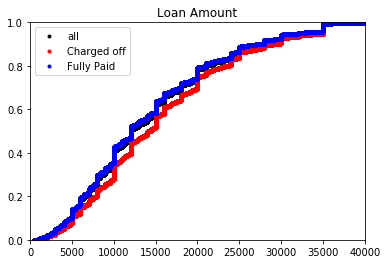

count    2.507640e+06
mean     1.441101e+04
std      8.663254e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64
count    498120.000000
mean      15507.632097
std        8743.623101
min         900.000000
25%        9000.000000
50%       14250.000000
75%       20200.000000
max       40000.000000
Name: loan_amnt, dtype: float64
count    2.009520e+06
mean     1.413918e+04
std      8.621673e+03
min      5.000000e+02
25%      7.500000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64


In [21]:
df_x,df_y = ecdf(df.loan_amnt)
df_bad_x,df_bad_y = ecdf(df_bad.loan_amnt)
df_pass_x,df_pass_y = ecdf(df_pass.loan_amnt)

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([0, 40000, 0, 1])
plt.title('Loan Amount')
plt.legend(loc='best')
plt.show()

print(df.loan_amnt.describe())
print(df_bad.loan_amnt.describe())
print(df_pass.loan_amnt.describe())

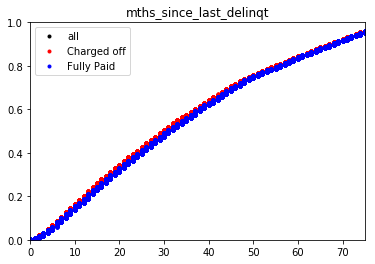

count    1.244114e+06
mean     3.426813e+01
std      2.192451e+01
min      0.000000e+00
25%      1.600000e+01
50%      3.100000e+01
75%      5.000000e+01
max      2.260000e+02
Name: mths_since_last_delinq, dtype: float64
count    256060.000000
mean         33.717879
std          21.975060
min           0.000000
25%          15.000000
50%          30.000000
75%          49.000000
max         226.000000
Name: mths_since_last_delinq, dtype: float64
count    988054.000000
mean         34.410729
std          21.909145
min           0.000000
25%          16.000000
50%          31.000000
75%          50.000000
max         192.000000
Name: mths_since_last_delinq, dtype: float64


In [22]:
df_x,df_y = ecdf(df.mths_since_last_delinq.dropna())
df_bad_x,df_bad_y = ecdf(df_bad.mths_since_last_delinq.dropna())
df_pass_x,df_pass_y = ecdf(df_pass.mths_since_last_delinq.dropna())

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([0, 75, 0, 1])
plt.title('mths_since_last_delinqt')
plt.legend(loc='best')
plt.show()

print(df.mths_since_last_delinq.describe())
print(df_bad.mths_since_last_delinq.describe())
print(df_pass.mths_since_last_delinq.describe())


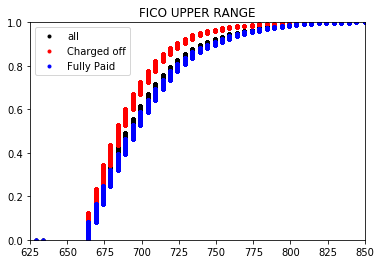

count    2.507640e+06
mean     6.998591e+02
std      3.161493e+01
min      6.290000e+02
25%      6.740000e+02
50%      6.940000e+02
75%      7.140000e+02
max      8.500000e+02
Name: fico_range_high, dtype: float64
count    498120.000000
mean        691.429563
std          25.552005
min         664.000000
25%         674.000000
50%         684.000000
75%         704.000000
max         850.000000
Name: fico_range_high, dtype: float64
count    2.009520e+06
mean     7.019486e+02
std      3.261042e+01
min      6.290000e+02
25%      6.790000e+02
50%      6.940000e+02
75%      7.190000e+02
max      8.500000e+02
Name: fico_range_high, dtype: float64


In [23]:
df_x,df_y = ecdf(df.fico_range_high)
df_bad_x,df_bad_y = ecdf(df_bad.fico_range_high)
df_pass_x,df_pass_y = ecdf(df_pass.fico_range_high)

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([625, 850, 0, 1])
plt.title('FICO UPPER RANGE')
plt.legend(loc='best')
plt.show()

print(df.fico_range_high.describe())
print(df_bad.fico_range_high.describe())
print(df_pass.fico_range_high.describe())

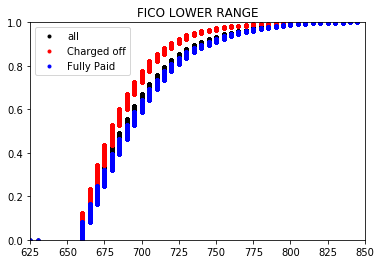

count    2.507640e+06
mean     6.958590e+02
std      3.161433e+01
min      6.250000e+02
25%      6.700000e+02
50%      6.900000e+02
75%      7.100000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64
count    498120.000000
mean        687.429515
std          25.551707
min         660.000000
25%         670.000000
50%         680.000000
75%         700.000000
max         845.000000
Name: fico_range_low, dtype: float64
count    2.009520e+06
mean     6.979485e+02
std      3.260976e+01
min      6.250000e+02
25%      6.750000e+02
50%      6.900000e+02
75%      7.150000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64


In [24]:
df_x,df_y = ecdf(df.fico_range_low)
df_bad_x,df_bad_y = ecdf(df_bad.fico_range_low)
df_pass_x,df_pass_y = ecdf(df_pass.fico_range_low)

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([625, 850, 0, 1])
plt.title('FICO LOWER RANGE')
plt.legend(loc='best')
plt.show()

print(df.fico_range_low.describe())
print(df_bad.fico_range_low.describe())
print(df_pass.fico_range_low.describe())

In [25]:
df_x,df_y = ecdf(df.tax_liens)
df_bad_x,df_bad_y = ecdf(df_bad.tax_liens)
df_pass_x,df_pass_y = ecdf(df_pass.tax_liens)

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([0, 1, 0, 1])
plt.title('tax_liens')
plt.legend(loc='best')
plt.show()

print(df.tax_liens.describe())
print(df_bad.tax_liens.describe())
print(df_pass.tax_liens.describe())

AttributeError: 'DataFrame' object has no attribute 'tax_liens'

In [27]:
df_bad.tot_coll_amt.describe()

count    477484.000000
mean        237.522505
std        1752.307548
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      146917.000000
Name: tot_coll_amt, dtype: float64

In [28]:
percentage(df,df_bad,'pub_rec_bankruptcies')

0.0      19.491481
1.0      22.368998
2.0      24.771136
3.0      22.841965
4.0      27.688172
5.0      24.060150
6.0      33.333333
7.0      26.666667
8.0      44.444444
9.0      50.000000
11.0    100.000000
12.0           NaN
Name: pub_rec_bankruptcies, dtype: float64


In [29]:
for col in df:
    print(col, df[col].isnull().values.any())

id False
loan_amnt False
funded_amnt False
funded_amnt_inv False
term False
int_rate False
installment False
grade False
sub_grade False
emp_length True
home_ownership False
annual_inc False
verification_status False
issue_d False
loan_status False
pymnt_plan False
purpose False
zip_code False
dti True
delinq_2yrs False
earliest_cr_line False
fico_range_low False
fico_range_high False
inq_last_6mths True
mths_since_last_delinq True
mths_since_last_record True
open_acc False
pub_rec False
revol_bal False
revol_util True
total_acc False
initial_list_status False
out_prncp False
out_prncp_inv False
total_pymnt False
total_pymnt_inv False
total_rec_prncp False
total_rec_int False
total_rec_late_fee False
recoveries False
collection_recovery_fee False
last_pymnt_d True
last_credit_pull_d True
last_fico_range_high False
last_fico_range_low False
collections_12_mths_ex_med True
mths_since_last_major_derog True
policy_code False
application_type False
annual_inc_joint True
dti_joint True
verif

In [30]:
df.pub_rec_bankruptcies.value_counts()

0.0     2195318
1.0      291904
2.0       14856
3.0        3012
4.0         744
5.0         266
6.0          90
7.0          30
8.0          18
9.0           4
12.0          2
11.0          2
Name: pub_rec_bankruptcies, dtype: int64

In [31]:
np.sum(df.loan_status.value_counts().values)

2507640

In [34]:
df.mo_sin_old_il_acct.value_counts()

125.0    28464
127.0    28340
126.0    28270
122.0    28240
130.0    28232
128.0    28200
124.0    28126
129.0    27900
132.0    27886
123.0    27856
121.0    27776
131.0    27502
133.0    27384
120.0    27202
134.0    27124
135.0    26666
136.0    26498
139.0    26244
137.0    26190
138.0    26082
140.0    25770
141.0    25380
142.0    24732
119.0    24506
144.0    24218
143.0    24162
145.0    23506
146.0    22870
147.0    22528
148.0    21860
         ...  
549.0        2
545.0        2
538.0        2
530.0        2
507.0        2
492.0        2
999.0        2
506.0        2
453.0        2
445.0        2
458.0        2
460.0        2
461.0        2
443.0        2
467.0        2
468.0        2
470.0        2
472.0        2
474.0        2
480.0        2
485.0        2
486.0        2
487.0        2
494.0        2
497.0        2
498.0        2
499.0        2
504.0        2
512.0        2
511.0        2
Name: mo_sin_old_il_acct, Length: 520, dtype: int64